In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("rfm_data.csv")
df

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LAST_TO_END   62988 non-null  int64
 1   FLIGHT_COUNT  62988 non-null  int64
 2   SEG_KM_SUM    62988 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [4]:
df.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
count,62988.000000,62988.000000,62988.000000
mean,176.120102,11.839414,17123.878691
std,183.822223,14.049471,20960.844623
min,1.000000,2.000000,368.000000
25%,29.000000,3.000000,4747.000000
50%,108.000000,7.000000,9994.000000
75%,268.000000,15.000000,21271.250000
max,731.000000,213.000000,580717.000000


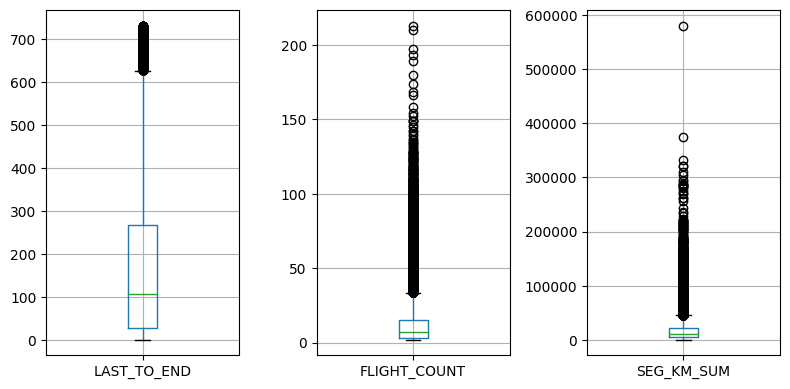

In [5]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

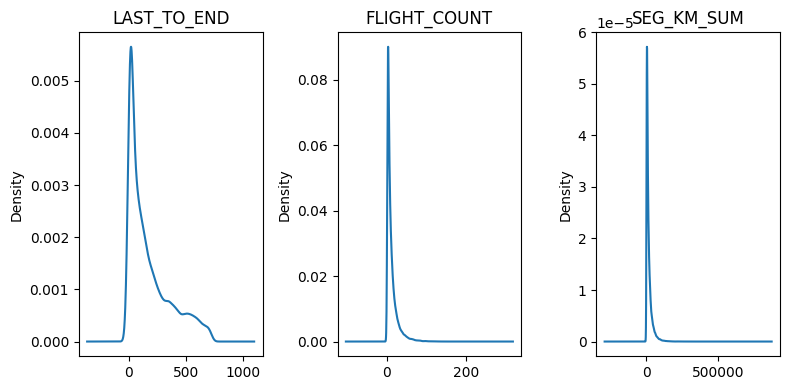

In [6]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [7]:
df.rename(columns = {'LAST_TO_END':'LAST_TO_END (R)', 'FLIGHT_COUNT':'FLIGHT_COUNT (F)', 'SEG_KM_SUM':'SEG_KM_SUM (M)'}, inplace=True)

In [8]:
df

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


# Data Pre-processing 

In [9]:
df.corr()

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
LAST_TO_END (R),1.000000,-0.404999,-0.369509
FLIGHT_COUNT (F),-0.404999,1.000000,0.850411
SEG_KM_SUM (M),-0.369509,0.850411,1.000000


In [10]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [11]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,-5.199338,4.005381,5.199338
1,-1.368450,3.173397,3.185191
2,-1.161976,3.154115,3.175301
3,-0.067799,1.104747,3.172989
4,-1.525529,3.225167,3.202017
...,...,...,...
62983,0.758004,-5.199338,-2.501455
62984,-0.111890,-0.492137,-0.192535
62985,-0.681594,-5.199338,-1.367617
62986,1.048748,-5.199338,-0.880888


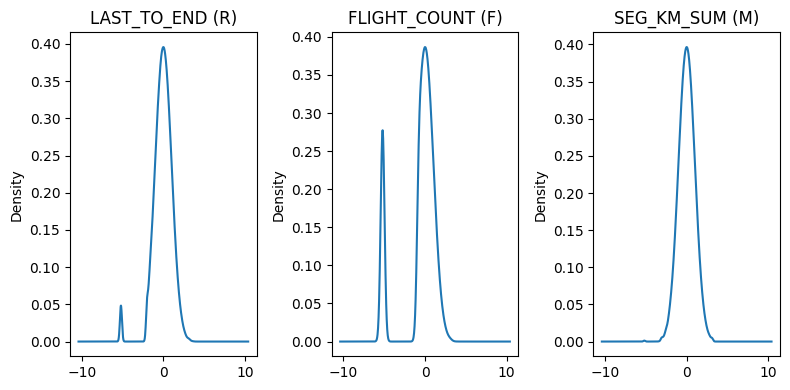

In [12]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

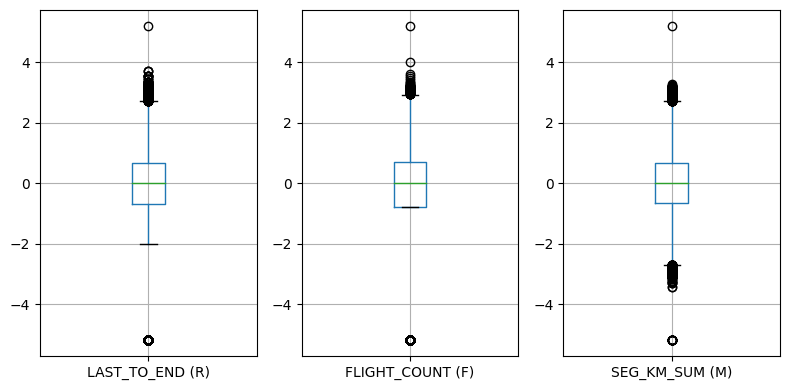

In [13]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8, 4))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [14]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column LAST_TO_END (R) outliers = 1.85
Column FLIGHT_COUNT (F) outliers = 16.68
Column SEG_KM_SUM (M) outliers = 0.71


# Raw K-MEANS

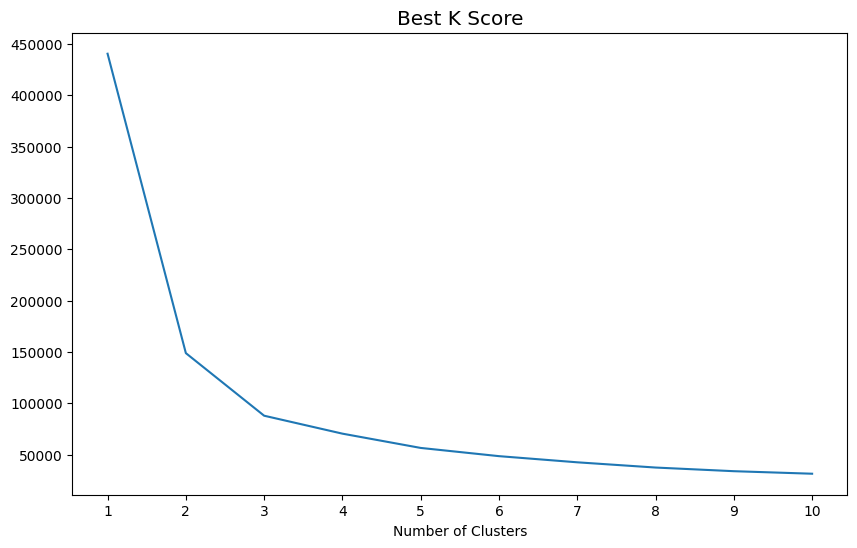

In [15]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.6908509015605588]
 For k = 3, the silhouette score is: [0.4622077812181174]
 For k = 4, the silhouette score is: [0.4692846795481471]
 For k = 5, the silhouette score is: [0.3925512870234768]
 For k = 6, the silhouette score is: [0.39317943141476713]
 For k = 7, the silhouette score is: [0.33754357809083196]
 For k = 8, the silhouette score is: [0.320467175429307]


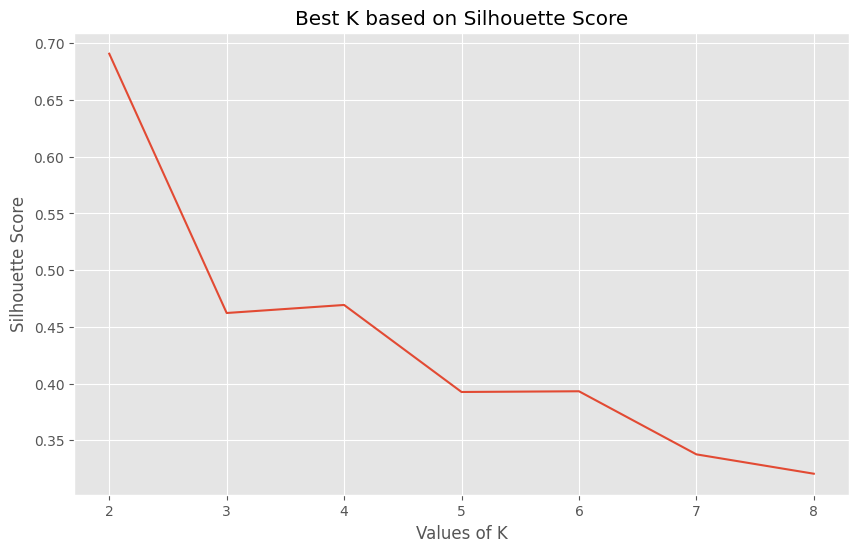

In [16]:
# Calculate Silhouette Score - SCALED
from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [17]:
# k = 2 (berdasarkan nilai silhouette)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M),cluster
0,-5.199338,4.005381,5.199338,1
1,-1.368450,3.173397,3.185191,1
2,-1.161976,3.154115,3.175301,1
3,-0.067799,1.104747,3.172989,1
4,-1.525529,3.225167,3.202017,1
...,...,...,...,...
62983,0.758004,-5.199338,-2.501455,0
62984,-0.111890,-0.492137,-0.192535,1
62985,-0.681594,-5.199338,-1.367617,0
62986,1.048748,-5.199338,-0.880888,0


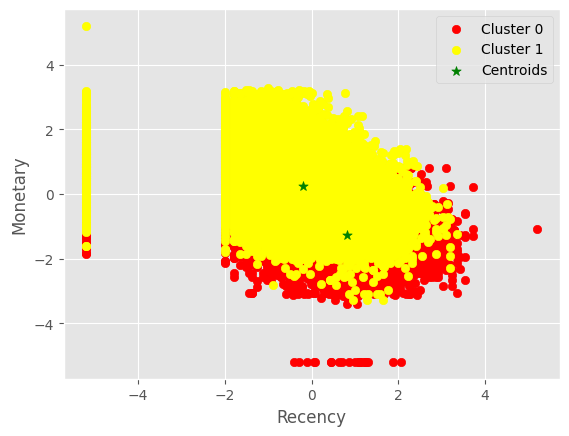

In [18]:
# plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2], c=df_scaled['cluster'], label=["Cluster 0", "Cluster 1"]);
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 50, marker = '*', label="Centroids")

# Scatter plot for cluster 0
plt.scatter(df_scaled[df_scaled['cluster'] == 0].iloc[:, 0], df_scaled[df_scaled['cluster'] == 0].iloc[:, 2], c='red', label='Cluster 0');

# Scatter plot for cluster 1
plt.scatter(df_scaled[df_scaled['cluster'] == 1].iloc[:, 0], df_scaled[df_scaled['cluster'] == 1].iloc[:, 2], c='yellow', label='Cluster 1');

# Scatter plot for cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=50, marker='*', c='green', label='Centroids')

plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend()
plt.show()

hasilnya:

cluster terpisah dengan baik hanya antara kolom R dengan F dan F dengan M dan cluster tidak terpisah dengan baik di antara kolom Recency (R) dan Monetary (M)

<Figure size 800x800 with 0 Axes>

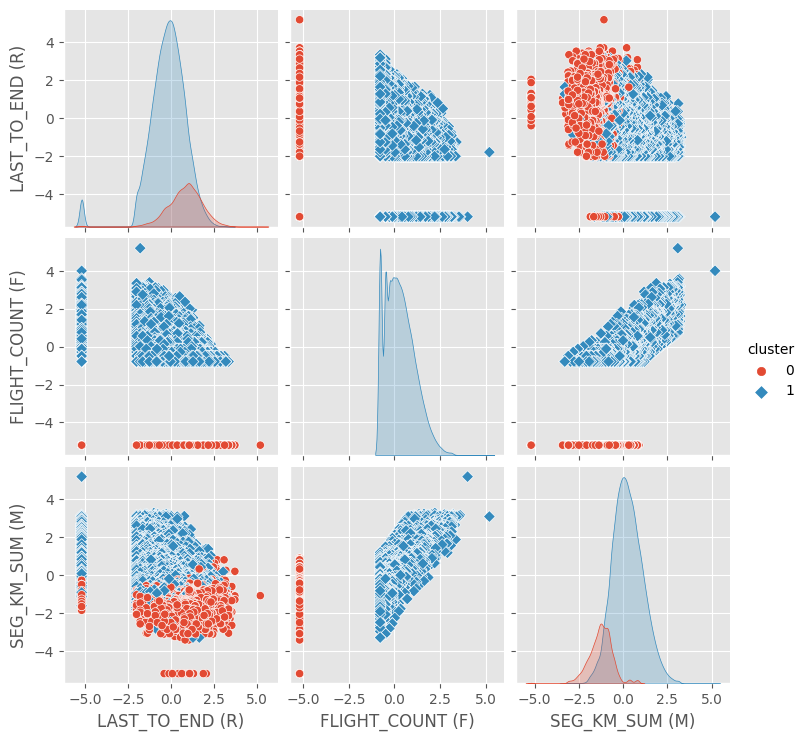

In [19]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster', markers=["o", "D"])

In [20]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,-5.199338,4.005381,5.199338
1,-1.368450,3.173397,3.185191
2,-1.161976,3.154115,3.175301
3,-0.067799,1.104747,3.172989
4,-1.525529,3.225167,3.202017
...,...,...,...
62983,0.758004,-5.199338,-2.501455
62984,-0.111890,-0.492137,-0.192535
62985,-0.681594,-5.199338,-1.367617
62986,1.048748,-5.199338,-0.880888


In [21]:
df_scaled

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M),cluster
0,-5.199338,4.005381,5.199338,1
1,-1.368450,3.173397,3.185191,1
2,-1.161976,3.154115,3.175301,1
3,-0.067799,1.104747,3.172989,1
4,-1.525529,3.225167,3.202017,1
...,...,...,...,...
62983,0.758004,-5.199338,-2.501455,0
62984,-0.111890,-0.492137,-0.192535,1
62985,-0.681594,-5.199338,-1.367617,0
62986,1.048748,-5.199338,-0.880888,0


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[ 7.37739502,  3.79494036],
       [ 4.86676707,  0.28815271],
       [ 4.78878943,  0.09901914],
       ...,
       [-4.40779812,  1.97945112],
       [-4.7176981 ,  0.38914379],
       [-4.68728369,  0.38289501]])

In [23]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,7.377395,3.794940,1
1,4.866767,0.288153,1
2,4.788789,0.099019,1
3,2.650263,-0.267684,1
4,4.962545,0.420778,1
...,...,...,...
62983,-5.203088,0.529080,0
62984,0.057729,0.013333,1
62985,-4.407798,1.979451,0
62986,-4.717698,0.389144,0


<Figure size 800x800 with 0 Axes>

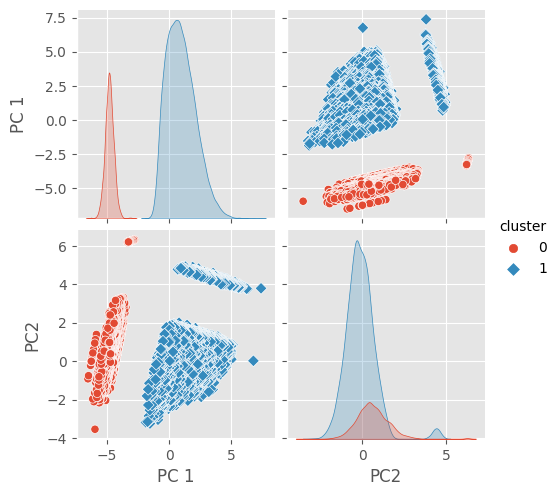

In [24]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', markers=["o", "D"])

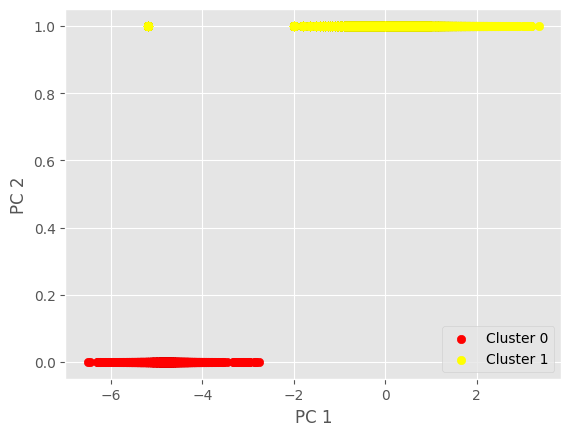

In [25]:
# Scatter plot for cluster 0
plt.scatter(df_pca[df_pca['cluster'] == 0].iloc[:, 0], df_pca[df_pca['cluster'] == 0].iloc[:, 2], c='red', label='Cluster 0');

# Scatter plot for cluster 1
plt.scatter(df_scaled[df_scaled['cluster'] == 1].iloc[:, 0], df_pca[df_pca['cluster'] == 1].iloc[:, 2], c='yellow', label='Cluster 1');

# Scatter plot for cluster centers
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=50, marker='*', c='green', label='Centroids')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()